In [1]:
# import sys
# sys.path.insert(0, "/home/msimon/Desktop/FEniCS/Tests")
import SimpleFunctions as SF

In [ ]:
ConstitutiveModels = ['Ogden', 'Neo-Hookean']
ConstitutiveModel = ConstitutiveModels[0]

NumberElementsTested = [1, 2, 3, 5, 10, 20]

LoadCases = ['Compression', 'Tension', 'SimpleShear']
RelativeWeights = [1,1,1]


FinalRelativeStretch = 0.1
RelativeStepSize     = 0.02


for NumberElements in NumberElementsTested:
    ResultsOptimization = SF.ParametersOptimization(ConstitutiveModel, NumberElements, LoadCases, RelativeWeights, FinalRelativeStretch, RelativeStepSize)

In [6]:
LoadCases = ['Compression', 'Tension', 'SimpleShear']
RelativeWeights = [1,1,1]
FinalRelativeStretch = 0.1
RelativeStepSize     = 0.01
Dimensions = [5,5,5]
NumberElements = 5
# Mu, Alpha = ResOpt.x
Mu, Alpha = [0.458, -31.279]
Nu = 0.391
D     = 3*(1-2*Nu)/(Mu*(1+Nu))     # (1/kPa)
print(D)

SF.CostFunction([Nu, Mu, Alpha], Dimensions, NumberElements, LoadCases, RelativeWeights, FinalRelativeStretch, RelativeStepSize, Plot = True)

1.0265618966594356


NameError: name 'SF' is not defined

0.3910553287620164
Cost: 111.42543079724135


111.42543079724135

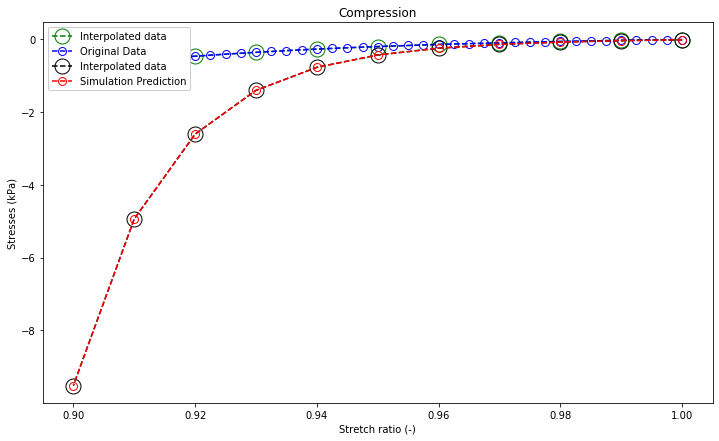

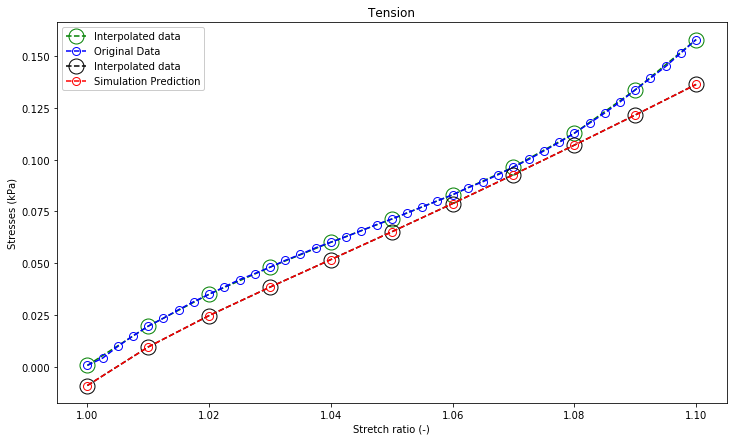

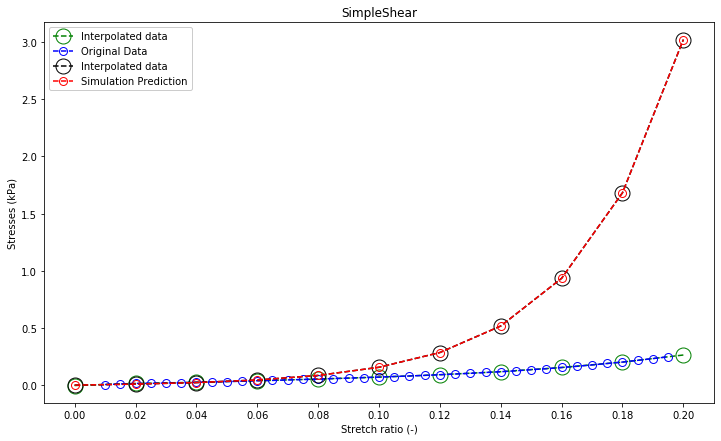

In [5]:
LoadCases = ['Compression', 'Tension', 'SimpleShear']
RelativeWeights = [1,1,1]
FinalRelativeStretch = 0.1
RelativeStepSize     = 0.01
Dimensions = [5,5,5]
NumberElements = 5
# Mu, Alpha = ResOpt.x
Mu, Alpha = [0.458, -59.367]
D = 1.026
K = 2/D
Nu = (3*(K/Mu)-2)/(6*(K/Mu)+2)
print(Nu)

SF.CostFunction([Nu, Mu, Alpha], Dimensions, NumberElements, LoadCases, RelativeWeights, FinalRelativeStretch, RelativeStepSize, Plot = True)

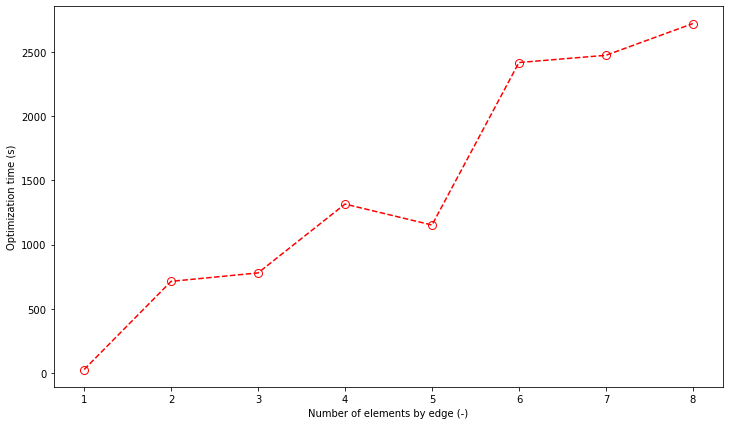

In [37]:
import pandas as pd                       # Allows to use data in tables
import matplotlib.pyplot as plt           # Allows to do plots

dt = pd.read_csv('OptimizationTime.txt', header=None)

plt.rc('figure', figsize=[12,7])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.cla()
ax.plot([1,2,3,4,5,6,7,8],dt,  color = 'r', linestyle = '--', marker = 'o', markersize = 8, fillstyle='none')
ax.set_xlabel('Number of elements by edge (-)')
ax.set_ylabel('Optimization time (s)')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))